# Music Dataset

In [8]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Exploration: Load and Review Dataset

In [9]:
music = pd.read_csv('MusicLabelGenre.csv')

In [10]:
music = music.drop(music[(music.Genre == "soundtrack") | (music.Genre == "folk") | (music.Genre == "punk") | (music.Genre == "rap") | (music.Genre == "bass")].index)

In [11]:
print("Dimensions of the Music dataset: {}".format(music.shape)) 
# Check number of columns (attributes) and rows (instances) in the data frame

Dimensions of the Music dataset: (7923, 24)


In [12]:
music.head()

,Song.name,Artist.name,Song_popularity,Artist_popularity,Duration,Bars_confidence,Bars_start,Beats_confidence,Beats_start,End_of_fade_in,...,Mode,Mode_confidence,Start_of_fade_out,Tatums_confidence,Tatums_start,Tempo,Terms_freq,Time_signature,Time_signature_confidence,Genre
0,Myth Takes,!!!,0.228580,0.293827,159.76444,0.836,0.57711,0.836,0.57711,3.030,...,1.000,0.556,154.529,0.827,0.25306,96.0960,1.00000,1.0,0.449,classical
1,A Soldiers Intro,(hed) p.e.,0.705223,0.543226,186.35710,0.001,1.86228,0.959,0.61516,0.165,...,-10.047,1.000,0.671,177.296,0.71100,0.1977,95.86600,1.0,4.000,country
2,Sublime Control,:Blacks On :Blondes,0.342908,0.281284,147.06893,0.284,0.39232,0.000,0.39232,2.061,...,1.000,0.460,144.399,0.845,0.20395,160.0670,1.00000,4.0,1.000,pop
3,Superconstellation,:Blacks On :Blondes,0.345802,0.320059,159.05914,0.976,0.08586,0.976,0.08586,3.796,...,1.000,0.292,147.847,0.263,0.08586,162.9540,0.98657,1.0,0.000,rock
5,M-Town 2 M-Town,089 Clique feat. Minnesota Snipe & Skinny Cueball,0.342908,0.268457,266.57914,0.001,1.52942,0.517,0.36226,0.000,...,1.000,0.307,260.278,0.461,0.36226,104.5210,1.00000,4.0,0.458,rock


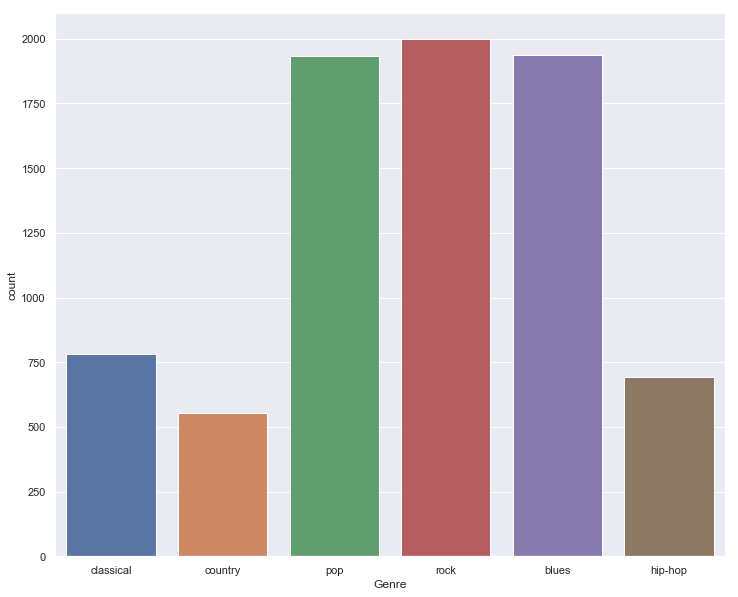

In [13]:
sns.set(rc={'figure.figsize':(12,10)})
music.groupby('Genre').size()
sns.countplot(music['Genre'],label="Count")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C475843780>],
      dtype=object)

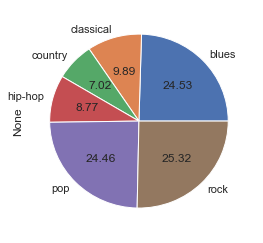

In [14]:
music.groupby('Genre').size().plot(kind='pie', subplots=True, figsize=(4, 4), autopct='%.2f')

In [15]:
filename = 'Music_Genre_new.csv'
music.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Music_Genre_new.csv


Identifying correlation in data graphically:

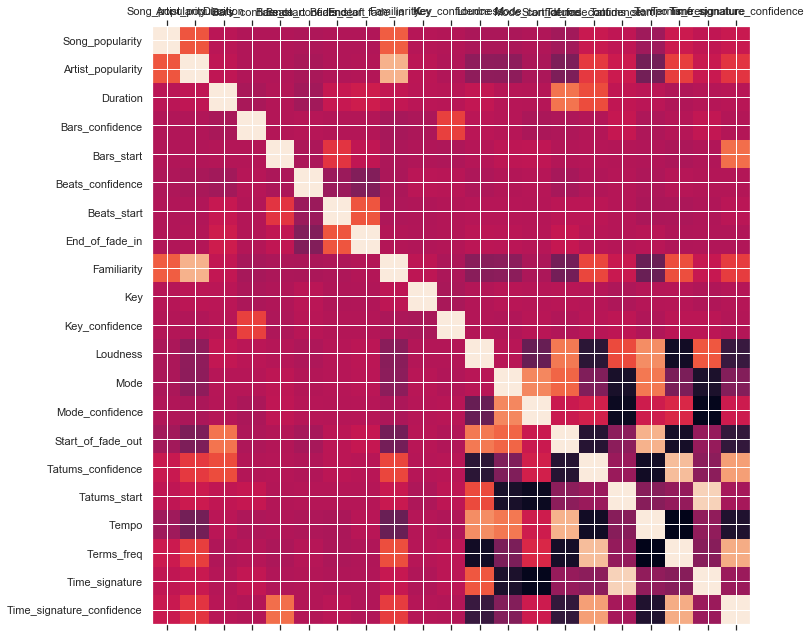

In [30]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(music)

In the above visualization plot, light colour represents maximum correlation and the dark colour represents minimum correlation. We can see none of the variable have proper correlation with any of the other variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C381127518>,
      dtype=object)

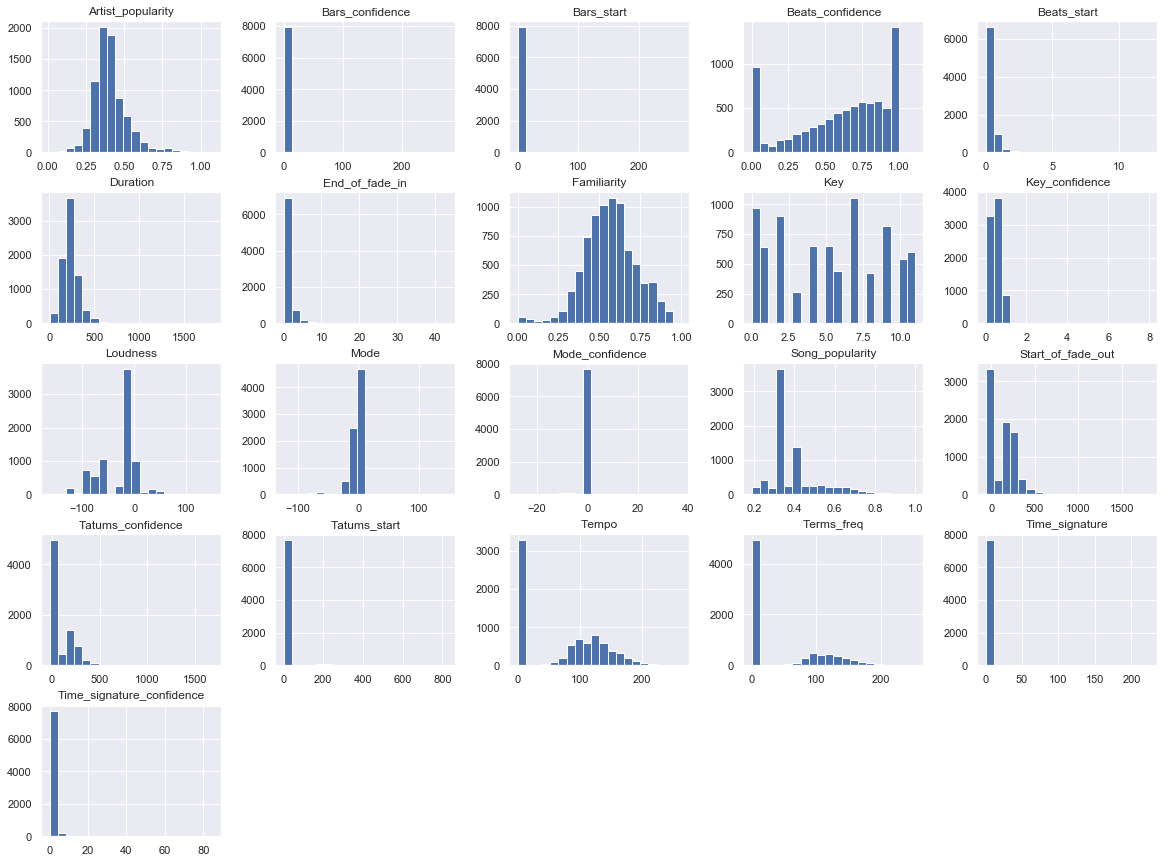

In [31]:
music.hist(figsize=(20,15),bins=20)

# Evaluation Measures for Algorithms

# Random Forest Algorithm

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
X = music.drop('Genre', axis=1)
y = music['Genre']
from sklearn.model_selection import train_test_split

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

from sklearn import model_selection

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, rfc_predict)))

print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Classification Report")
print(classification_report(y_test, rfc_predict))
print('\n')

Model Accuracy: 0.41
Confusion Matrix
[[338  41  17  17 123  87]
 [ 67  82   9   6  51  27]
 [ 64  21  26   6  40  33]
 [ 52  13   4  45  59  54]
 [159  45  18  26 267 151]
 [154  16  16  25 154 307]]


Classification Report
             precision    recall  f1-score   support

      blues       0.41      0.54      0.46       623
  classical       0.38      0.34      0.36       242
    country       0.29      0.14      0.19       190
    hip-hop       0.36      0.20      0.26       227
        pop       0.38      0.40      0.39       666
       rock       0.47      0.46      0.46       672

avg / total       0.40      0.41      0.40      2620



